# **순위**
**문제설명**

n명의 권투선수가 권투 대회에 참여했고 각각 1번부터 n번까지 번호를 받았습니다. 권투 경기는 1대1 방식으로 진행이 되고, 만약 A 선수가 B 선수보다 실력이 좋다면 A 선수는 B 선수를 항상 이깁니다. 심판은 주어진 경기 결과를 가지고 선수들의 순위를 매기려 합니다. 하지만 몇몇 경기 결과를 분실하여 정확하게 순위를 매길 수 없습니다.

선수의 수 n, 경기 결과를 담은 2차원 배열 results가 매개변수로 주어질 때 정확하게 순위를 매길 수 있는 선수의 수를 return 하도록 solution 함수를 작성해주세요.

## **제한사항**

*   선수의 수는 1명 이상 100명 이하입니다.
*   경기 결과는 1개 이상 4,500개 이하입니다.
*   results 배열 각 행 [A, B]는 A 선수가 B 선수를 이겼다는 의미입니다.
*   모든 경기 결과에는 모순이 없습니다.

**입출력 예**

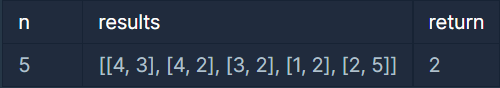

**입출력 예 설명**

2번 선수는 [1, 3, 4] 선수에게 패배했고 5번 선수에게 승리했기 때문에 4위입니다.
5번 선수는 4위인 2번 선수에게 패배했기 때문에 5위입니다.

In [ ]:
#bfs
from collections import deque
def make_graph(n, graph):
    g_win = [[] for i in range(n)]
    g_lose = [[] for i in range(n)]
    for elem in graph:
        g_win[elem[0] - 1].append(elem[1] - 1)
        g_lose[elem[1] - 1].append(elem[0] - 1)
    return g_win, g_lose

In [ ]:
def bfs(n, graph, visited):
    q = deque([n])
    visited[n] = True
    answer = 0
    while q:
        v = q.popleft()
        for i in graph[v]:
            if not visited[i]:
                q.append(i)
                visited[i] = True
                answer += 1
    return answer

In [ ]:
def solution(n, results):
    g_win, g_lose = make_graph(n, results)
    answer = 0
    for i in range(n):
        visited_win = [False] * n
        visited_lose = [False] * n
        a = bfs(i, g_win, visited_win)
        b = bfs(i, g_lose, visited_lose)
        if a + b +1 == n:
            answer += 1
    return answer